<h2><center>Описание</center></h2>

Датасет Data_1 содержит следующие столбцы:
- conversion_unique_id - уникальный идентификатор установки (юзера)
- conversion_datetime - время, когда была произведена установка
- attributed_touch_time - время, когда юзер (в последствии установивший приложение) взаимодействовал с рекламным объявлением

<h2><center>Задание</center></h2>

Необходимо создать столбец tti (time to install) и рассчитать в нем:
- для каждой установки разницу между временем установки и временем взаимодействия с
рекламой
- После этого на отдельной вкладке построить PDF (probability density function) распределение значений tti в логарифмическом распределение (0 - 10с - 100с - 1000с - 10000с - 100000с)


In [1]:
import pandas as pd
import numpy as np
import datetime as dt

**Считываем данные + парсим колонки с датами**


In [2]:
data1 = pd.read_excel("Data_1 (+).xlsx", index_col = "conversion_unique_id", 
                      parse_dates=['conversion_datetime', 'attributed_touch_time'])

In [3]:
data1.head()

,conversion_datetime,attributed_touch_time,offer_id,publisher_id
conversion_unique_id,,,,
001c675c7cdb23b2cf9d6316aebba2ab0222339b,2019-01-04 01:06:23,2019-01-03 21:56:15,APP,Publisher
007c9a5411442400766cd0f5d0807da5ccfe06d1,2019-01-03 12:19:43,2019-01-03 11:10:33,APP,Publisher
019b86102e6aad24386922e6d5227c215f688c43,2019-01-03 05:36:11,2019-01-02 23:51:06,APP,Publisher
019e123a977fbf9676e9598c1534eda98fc1db5d,2019-01-06 13:47:34,2019-01-06 12:46:24,APP,Publisher
01cd0016a3719bd60d0c6542e98aafd458a8430f,2019-01-03 21:34:42,2019-01-03 21:32:52,APP,Publisher


**Чекаем что у нас по датасету**


In [4]:
data1.describe()

,conversion_datetime,attributed_touch_time,offer_id,publisher_id
count,1059,1059,1059,1059
unique,1053,1056,1,1
top,2019-01-03 08:39:22,2019-01-04 11:41:28,APP,Publisher
freq,2,2,1059,1059
first,2019-01-03 00:01:42,2018-12-27 19:05:03,NaN,NaN
last,2019-01-06 23:10:05,2019-01-06 22:29:22,NaN,NaN


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1059 entries, 001c675c7cdb23b2cf9d6316aebba2ab0222339b to ffb3870cafc7514d05a74dd276ef4f18c163afa6
Data columns (total 4 columns):
conversion_datetime      1059 non-null datetime64[ns]
attributed_touch_time    1059 non-null datetime64[ns]
offer_id                 1059 non-null object
publisher_id             1059 non-null object
dtypes: datetime64[ns](2), object(2)
memory usage: 41.4+ KB


**Создаём новую колонку time to install (tti)**

In [6]:
data1['tti'] = data1['conversion_datetime'] - data1['attributed_touch_time'] 

In [7]:
data1.head()

,conversion_datetime,attributed_touch_time,offer_id,publisher_id,tti
conversion_unique_id,,,,,
001c675c7cdb23b2cf9d6316aebba2ab0222339b,2019-01-04 01:06:23,2019-01-03 21:56:15,APP,Publisher,03:10:08
007c9a5411442400766cd0f5d0807da5ccfe06d1,2019-01-03 12:19:43,2019-01-03 11:10:33,APP,Publisher,01:09:10
019b86102e6aad24386922e6d5227c215f688c43,2019-01-03 05:36:11,2019-01-02 23:51:06,APP,Publisher,05:45:05
019e123a977fbf9676e9598c1534eda98fc1db5d,2019-01-06 13:47:34,2019-01-06 12:46:24,APP,Publisher,01:01:10
01cd0016a3719bd60d0c6542e98aafd458a8430f,2019-01-03 21:34:42,2019-01-03 21:32:52,APP,Publisher,00:01:50


**Бахаю tti в секунды и пуляю в очередную новую колонку**

In [8]:
data1['tti_seconds'] = data1['tti'].dt.total_seconds()

In [9]:
data1.head()

,conversion_datetime,attributed_touch_time,offer_id,publisher_id,tti,tti_seconds
conversion_unique_id,,,,,,
001c675c7cdb23b2cf9d6316aebba2ab0222339b,2019-01-04 01:06:23,2019-01-03 21:56:15,APP,Publisher,03:10:08,11408.0
007c9a5411442400766cd0f5d0807da5ccfe06d1,2019-01-03 12:19:43,2019-01-03 11:10:33,APP,Publisher,01:09:10,4150.0
019b86102e6aad24386922e6d5227c215f688c43,2019-01-03 05:36:11,2019-01-02 23:51:06,APP,Publisher,05:45:05,20705.0
019e123a977fbf9676e9598c1534eda98fc1db5d,2019-01-06 13:47:34,2019-01-06 12:46:24,APP,Publisher,01:01:10,3670.0
01cd0016a3719bd60d0c6542e98aafd458a8430f,2019-01-03 21:34:42,2019-01-03 21:32:52,APP,Publisher,00:01:50,110.0


**Чисто из интереса смотрим что у нас по распределениям значений**

In [10]:
data1.tti_seconds.describe()

count      1059.000000
mean      21651.459868
std       69051.614924
min           2.000000
25%        1726.500000
50%        7801.000000
75%       15896.000000
max      585535.000000
Name: tti_seconds, dtype: float64

**Строим график вероятностного распределения**

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8)) #чтобы не мучать глазки
proba_plot = sns.distplot(data1['tti_seconds'], bins = len(data1['tti_seconds']))
proba_plot.set_title('Probability dension log 10')
proba_plot.set(ylabel = "Probability")
proba_plot.set_xscale('log') #Масштабирую ось по Х



Не совсем то, что хотелось бы

In [31]:
#Список с нужными нам диапазонами
diap_list = [[0,1], [1, 10], [10, 100], [100,1000], [1000,10000], [10000, 100000], [100000, np.inf]]

In [32]:
log_time_diap = pd.DataFrame()

In [33]:
#Добавляем данные в таблицу
for el in diap_list:
    data1[str(el[0])+'_'+str(el[1])] = data1['tti_seconds'].apply(lambda x :  int((x > el[0]) and (x <= el[1])))

In [34]:
log_time_col = data1.columns[-7:]

In [35]:
log_time_col

Index(['0_1', '1_10', '10_100', '100_1000', '1000_10000', '10000_100000',
       '100000_inf'],
      dtype='object')

In [36]:
log_time = pd.DataFrame(data1[log_time_col].sum(), columns = ['num'])

In [37]:
log_time

,num
0_1,0
1_10,4
10_100,64
100_1000,162
1000_10000,365
10000_100000,431
100000_inf,33


In [38]:
log_time['proba'] = log_time['num']/data1.shape[0]

In [39]:
log_time = log_time.transpose()
log_time

,0_1,1_10,10_100,100_1000,1000_10000,10000_100000,100000_inf
num,0.0,4.000000,64.000000,162.000000,365.000000,431.000000,33.000000
proba,0.0,0.003777,0.060434,0.152975,0.344665,0.406988,0.031161


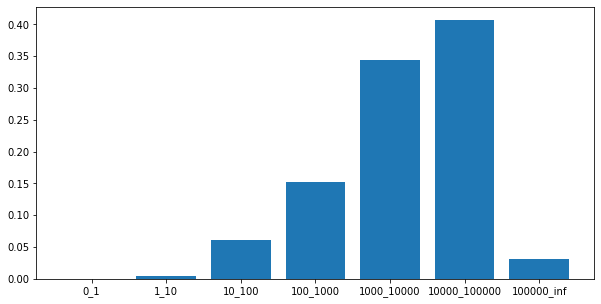

In [40]:
plt.figure(figsize=(10,5)) 
labels = log_time.columns
proba_values = log_time[labels].iloc[1]
width = 0.35
plt.bar(labels, proba_values);


То, что нужно!